In [1]:
import torch
import math
from utils import SatProblemDataSet
from model import MLP, LayerNormBasicLSTMCell, NeuroSAT, compute_loss
from tqdm import tqdm
import sys
sys.path.append('utils')

# from utils import mk_problem
# torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
n = NeuroSAT(128, 3, 3, 16)

In [3]:
ds = SatProblemDataSet("data/pickle/train/sr5")
dl = torch.utils.data.DataLoader(ds)

In [4]:
optim = torch.optim.Adam(n.parameters(), lr = 1e-5, weight_decay = 1e-10)

In [5]:
n.train()
losses = []
loss_fn = torch.nn.BCELoss()
for _ in range(1):
    for prob, target in tqdm(dl):
        optim.zero_grad()
        outputs = n(prob[0].float())
        torch.nn.utils.clip_grad_norm_(n.parameters(), 0.5)
        loss = compute_loss(outputs, target[0], n.parameters())
#         loss = loss_fn(outputs, target[0])
        desc = 'loss: %.4f; is_sta: %s' % (loss.item(), target[0])
        losses.append(loss.item())
        print(desc)

        loss.backward()
        optim.step()

  0%|          | 0/200 [00:00<?, ?it/s]/home/l0rem1psum/anaconda3/envs/neurosat/lib/python3.6/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370120218/work/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag
  0%|          | 1/200 [00:00<00:34,  5.78it/s]

loss: 0.8010; is_sta: tensor([0.])
loss: 0.6154; is_sta: tensor([1.])


  2%|▏         | 3/200 [00:00<00:28,  6.81it/s]

loss: 0.7815; is_sta: tensor([0.])
loss: 0.6151; is_sta: tensor([1.])


  2%|▎         | 5/200 [00:00<00:34,  5.73it/s]

loss: 0.7881; is_sta: tensor([0.])


  3%|▎         | 6/200 [00:01<00:36,  5.31it/s]

loss: 0.6116; is_sta: tensor([1.])


  4%|▎         | 7/200 [00:01<00:38,  5.03it/s]

loss: 0.7774; is_sta: tensor([0.])
loss: 0.6178; is_sta: tensor([1.])


  4%|▍         | 9/200 [00:01<00:37,  5.11it/s]

loss: 0.7782; is_sta: tensor([0.])
loss: 0.6160; is_sta: tensor([1.])


  6%|▌         | 11/200 [00:02<00:36,  5.17it/s]

loss: 0.7914; is_sta: tensor([0.])
loss: 0.6063; is_sta: tensor([1.])


  7%|▋         | 14/200 [00:02<00:29,  6.28it/s]

loss: 0.7741; is_sta: tensor([0.])
loss: 0.6193; is_sta: tensor([1.])


  8%|▊         | 15/200 [00:02<00:29,  6.32it/s]

loss: 0.7769; is_sta: tensor([0.])
loss: 0.6173; is_sta: tensor([1.])


  8%|▊         | 17/200 [00:02<00:27,  6.60it/s]

loss: 0.7727; is_sta: tensor([0.])
loss: 0.6209; is_sta: tensor([1.])


 10%|▉         | 19/200 [00:03<00:31,  5.68it/s]

loss: 0.7870; is_sta: tensor([0.])


 10%|█         | 20/200 [00:03<00:30,  5.85it/s]

loss: 0.6092; is_sta: tensor([1.])
loss: 0.7730; is_sta: tensor([0.])


 11%|█         | 22/200 [00:03<00:33,  5.37it/s]

loss: 0.6208; is_sta: tensor([1.])


 12%|█▏        | 23/200 [00:04<00:33,  5.22it/s]

loss: 0.7776; is_sta: tensor([0.])


 12%|█▏        | 24/200 [00:04<00:34,  5.07it/s]

loss: 0.6174; is_sta: tensor([1.])
loss: 0.7686; is_sta: tensor([0.])


 13%|█▎        | 26/200 [00:04<00:32,  5.38it/s]

loss: 0.6243; is_sta: tensor([1.])
loss: 0.7793; is_sta: tensor([0.])


 14%|█▍        | 28/200 [00:04<00:31,  5.43it/s]

loss: 0.6162; is_sta: tensor([1.])
loss: 0.7595; is_sta: tensor([0.])


 16%|█▌        | 31/200 [00:05<00:25,  6.60it/s]

loss: 0.6351; is_sta: tensor([1.])
loss: 0.7611; is_sta: tensor([0.])


 16%|█▌        | 32/200 [00:05<00:26,  6.42it/s]

loss: 0.6312; is_sta: tensor([1.])
loss: 0.7658; is_sta: tensor([0.])


 17%|█▋        | 34/200 [00:05<00:25,  6.46it/s]

loss: 0.6263; is_sta: tensor([1.])
loss: 0.7729; is_sta: tensor([0.])


 18%|█▊        | 36/200 [00:06<00:27,  6.03it/s]

loss: 0.6218; is_sta: tensor([1.])
loss: 0.7632; is_sta: tensor([0.])


 19%|█▉        | 38/200 [00:06<00:25,  6.27it/s]

loss: 0.6286; is_sta: tensor([1.])
loss: 0.7722; is_sta: tensor([0.])


 20%|██        | 40/200 [00:06<00:28,  5.64it/s]

loss: 0.6223; is_sta: tensor([1.])


 20%|██        | 41/200 [00:07<00:30,  5.30it/s]

loss: 0.7691; is_sta: tensor([0.])
loss: 0.6243; is_sta: tensor([1.])


 22%|██▏       | 43/200 [00:07<00:28,  5.51it/s]

loss: 0.7599; is_sta: tensor([0.])
loss: 0.6315; is_sta: tensor([1.])


 22%|██▎       | 45/200 [00:07<00:27,  5.64it/s]

loss: 0.7541; is_sta: tensor([0.])
loss: 0.6376; is_sta: tensor([1.])


 24%|██▎       | 47/200 [00:08<00:24,  6.26it/s]

loss: 0.7590; is_sta: tensor([0.])
loss: 0.6323; is_sta: tensor([1.])


 24%|██▍       | 49/200 [00:08<00:23,  6.47it/s]

loss: 0.7579; is_sta: tensor([0.])
loss: 0.6331; is_sta: tensor([1.])


 26%|██▌       | 51/200 [00:08<00:23,  6.26it/s]

loss: 0.7596; is_sta: tensor([0.])
loss: 0.6319; is_sta: tensor([1.])


 26%|██▋       | 53/200 [00:09<00:23,  6.30it/s]

loss: 0.7534; is_sta: tensor([0.])
loss: 0.6374; is_sta: tensor([1.])


 28%|██▊       | 55/200 [00:09<00:21,  6.61it/s]

loss: 0.7563; is_sta: tensor([0.])
loss: 0.6346; is_sta: tensor([1.])


 28%|██▊       | 57/200 [00:09<00:27,  5.25it/s]

loss: 0.7555; is_sta: tensor([0.])


 29%|██▉       | 58/200 [00:09<00:26,  5.37it/s]

loss: 0.6352; is_sta: tensor([1.])
loss: 0.7528; is_sta: tensor([0.])


 30%|███       | 60/200 [00:10<00:23,  5.84it/s]

loss: 0.6376; is_sta: tensor([1.])
loss: 0.7502; is_sta: tensor([0.])


 31%|███       | 62/200 [00:10<00:22,  6.10it/s]

loss: 0.6403; is_sta: tensor([1.])
loss: 0.7508; is_sta: tensor([0.])


 32%|███▏      | 64/200 [00:10<00:21,  6.20it/s]

loss: 0.6395; is_sta: tensor([1.])
loss: 0.7505; is_sta: tensor([0.])


 33%|███▎      | 66/200 [00:11<00:21,  6.17it/s]

loss: 0.6398; is_sta: tensor([1.])
loss: 0.7486; is_sta: tensor([0.])


 34%|███▍      | 68/200 [00:11<00:22,  5.76it/s]

loss: 0.6413; is_sta: tensor([1.])


 34%|███▍      | 69/200 [00:11<00:24,  5.38it/s]

loss: 0.7510; is_sta: tensor([0.])
loss: 0.6395; is_sta: tensor([1.])


 36%|███▌      | 72/200 [00:12<00:20,  6.31it/s]

loss: 0.7584; is_sta: tensor([0.])
loss: 0.6346; is_sta: tensor([1.])


 36%|███▋      | 73/200 [00:12<00:20,  6.27it/s]

loss: 0.7487; is_sta: tensor([0.])
loss: 0.6415; is_sta: tensor([1.])


 38%|███▊      | 75/200 [00:12<00:21,  5.69it/s]

loss: 0.7470; is_sta: tensor([0.])
loss: 0.6428; is_sta: tensor([1.])


 38%|███▊      | 77/200 [00:13<00:22,  5.42it/s]

loss: 0.7445; is_sta: tensor([0.])
loss: 0.6454; is_sta: tensor([1.])


 40%|███▉      | 79/200 [00:13<00:20,  5.95it/s]

loss: 0.7437; is_sta: tensor([0.])
loss: 0.6458; is_sta: tensor([1.])


 40%|████      | 81/200 [00:13<00:22,  5.35it/s]

loss: 0.7456; is_sta: tensor([0.])
loss: 0.6444; is_sta: tensor([1.])


 42%|████▏     | 84/200 [00:14<00:18,  6.39it/s]

loss: 0.7429; is_sta: tensor([0.])
loss: 0.6469; is_sta: tensor([1.])


 42%|████▎     | 85/200 [00:14<00:19,  5.99it/s]

loss: 0.7445; is_sta: tensor([0.])
loss: 0.6450; is_sta: tensor([1.])


 44%|████▎     | 87/200 [00:14<00:18,  6.01it/s]

loss: 0.7393; is_sta: tensor([0.])
loss: 0.6498; is_sta: tensor([1.])


 44%|████▍     | 89/200 [00:15<00:18,  5.99it/s]

loss: 0.7432; is_sta: tensor([0.])
loss: 0.6463; is_sta: tensor([1.])


 46%|████▌     | 91/200 [00:15<00:18,  5.93it/s]

loss: 0.7394; is_sta: tensor([0.])
loss: 0.6496; is_sta: tensor([1.])


 46%|████▋     | 93/200 [00:15<00:18,  5.77it/s]

loss: 0.7358; is_sta: tensor([0.])
loss: 0.6540; is_sta: tensor([1.])


 48%|████▊     | 95/200 [00:16<00:17,  5.93it/s]

loss: 0.7414; is_sta: tensor([0.])
loss: 0.6480; is_sta: tensor([1.])


 48%|████▊     | 97/200 [00:16<00:16,  6.30it/s]

loss: 0.7374; is_sta: tensor([0.])
loss: 0.6518; is_sta: tensor([1.])


 50%|████▉     | 99/200 [00:16<00:17,  5.83it/s]

loss: 0.7375; is_sta: tensor([0.])
loss: 0.6514; is_sta: tensor([1.])


 51%|█████     | 102/200 [00:17<00:14,  6.62it/s]

loss: 0.7416; is_sta: tensor([0.])
loss: 0.6479; is_sta: tensor([1.])


 52%|█████▏    | 104/200 [00:17<00:13,  7.29it/s]

loss: 0.7385; is_sta: tensor([0.])
loss: 0.6509; is_sta: tensor([1.])


 53%|█████▎    | 106/200 [00:17<00:12,  7.53it/s]

loss: 0.7359; is_sta: tensor([0.])
loss: 0.6537; is_sta: tensor([1.])


 54%|█████▍    | 108/200 [00:18<00:11,  7.76it/s]

loss: 0.7279; is_sta: tensor([0.])
loss: 0.6606; is_sta: tensor([1.])


 55%|█████▍    | 109/200 [00:18<00:11,  7.63it/s]

loss: 0.7316; is_sta: tensor([0.])
loss: 0.6574; is_sta: tensor([1.])


 56%|█████▌    | 112/200 [00:18<00:11,  7.68it/s]

loss: 0.7328; is_sta: tensor([0.])
loss: 0.6563; is_sta: tensor([1.])


 57%|█████▋    | 114/200 [00:18<00:11,  7.52it/s]

loss: 0.7216; is_sta: tensor([0.])
loss: 0.6680; is_sta: tensor([1.])


 57%|█████▊    | 115/200 [00:19<00:11,  7.11it/s]

loss: 0.7301; is_sta: tensor([0.])
loss: 0.6588; is_sta: tensor([1.])


 59%|█████▉    | 118/200 [00:19<00:11,  7.45it/s]

loss: 0.7323; is_sta: tensor([0.])
loss: 0.6564; is_sta: tensor([1.])


 60%|█████▉    | 119/200 [00:19<00:11,  6.95it/s]

loss: 0.7377; is_sta: tensor([0.])
loss: 0.6517; is_sta: tensor([1.])


 60%|██████    | 121/200 [00:19<00:11,  6.64it/s]

loss: 0.7358; is_sta: tensor([0.])
loss: 0.6530; is_sta: tensor([1.])


 62%|██████▏   | 124/200 [00:20<00:10,  7.50it/s]

loss: 0.7238; is_sta: tensor([0.])
loss: 0.6648; is_sta: tensor([1.])


 62%|██████▎   | 125/200 [00:20<00:10,  7.21it/s]

loss: 0.7362; is_sta: tensor([0.])
loss: 0.6527; is_sta: tensor([1.])


 64%|██████▍   | 128/200 [00:20<00:09,  7.43it/s]

loss: 0.7316; is_sta: tensor([0.])
loss: 0.6569; is_sta: tensor([1.])


 65%|██████▌   | 130/200 [00:21<00:09,  7.46it/s]

loss: 0.7324; is_sta: tensor([0.])
loss: 0.6560; is_sta: tensor([1.])


 66%|██████▌   | 132/200 [00:21<00:08,  7.72it/s]

loss: 0.7313; is_sta: tensor([0.])
loss: 0.6571; is_sta: tensor([1.])


 67%|██████▋   | 134/200 [00:21<00:08,  7.51it/s]

loss: 0.7305; is_sta: tensor([0.])
loss: 0.6577; is_sta: tensor([1.])


 68%|██████▊   | 136/200 [00:21<00:08,  7.79it/s]

loss: 0.7223; is_sta: tensor([0.])
loss: 0.6667; is_sta: tensor([1.])


 69%|██████▉   | 138/200 [00:22<00:07,  7.88it/s]

loss: 0.7288; is_sta: tensor([0.])
loss: 0.6595; is_sta: tensor([1.])


 70%|██████▉   | 139/200 [00:22<00:08,  7.22it/s]

loss: 0.7325; is_sta: tensor([0.])
loss: 0.6559; is_sta: tensor([1.])


 71%|███████   | 142/200 [00:22<00:08,  7.21it/s]

loss: 0.7249; is_sta: tensor([0.])
loss: 0.6632; is_sta: tensor([1.])


 72%|███████▏  | 143/200 [00:22<00:08,  7.05it/s]

loss: 0.7360; is_sta: tensor([0.])
loss: 0.6540; is_sta: tensor([1.])


 72%|███████▎  | 145/200 [00:23<00:07,  7.08it/s]

loss: 0.7331; is_sta: tensor([0.])
loss: 0.6555; is_sta: tensor([1.])


 74%|███████▍  | 148/200 [00:23<00:07,  7.40it/s]

loss: 0.7212; is_sta: tensor([0.])
loss: 0.6671; is_sta: tensor([1.])


 75%|███████▌  | 150/200 [00:23<00:06,  7.56it/s]

loss: 0.7273; is_sta: tensor([0.])
loss: 0.6609; is_sta: tensor([1.])


 76%|███████▌  | 151/200 [00:24<00:06,  7.35it/s]

loss: 0.7275; is_sta: tensor([0.])
loss: 0.6607; is_sta: tensor([1.])


 77%|███████▋  | 154/200 [00:24<00:06,  7.51it/s]

loss: 0.7244; is_sta: tensor([0.])
loss: 0.6636; is_sta: tensor([1.])


 78%|███████▊  | 155/200 [00:24<00:06,  7.29it/s]

loss: 0.7260; is_sta: tensor([0.])
loss: 0.6622; is_sta: tensor([1.])


 79%|███████▉  | 158/200 [00:24<00:05,  7.28it/s]

loss: 0.7203; is_sta: tensor([0.])
loss: 0.6680; is_sta: tensor([1.])


 80%|███████▉  | 159/200 [00:25<00:05,  7.13it/s]

loss: 0.7184; is_sta: tensor([0.])
loss: 0.6697; is_sta: tensor([1.])


 80%|████████  | 161/200 [00:25<00:05,  7.38it/s]

loss: 0.7144; is_sta: tensor([0.])
loss: 0.6741; is_sta: tensor([1.])


 82%|████████▏ | 164/200 [00:25<00:05,  7.15it/s]

loss: 0.7185; is_sta: tensor([0.])
loss: 0.6694; is_sta: tensor([1.])


 82%|████████▎ | 165/200 [00:25<00:05,  6.99it/s]

loss: 0.7158; is_sta: tensor([0.])
loss: 0.6724; is_sta: tensor([1.])


 84%|████████▍ | 168/200 [00:26<00:04,  7.35it/s]

loss: 0.7216; is_sta: tensor([0.])
loss: 0.6662; is_sta: tensor([1.])


 84%|████████▍ | 169/200 [00:26<00:04,  6.68it/s]

loss: 0.7227; is_sta: tensor([0.])
loss: 0.6651; is_sta: tensor([1.])


 86%|████████▌ | 172/200 [00:26<00:03,  7.03it/s]

loss: 0.7145; is_sta: tensor([0.])
loss: 0.6747; is_sta: tensor([1.])


 86%|████████▋ | 173/200 [00:27<00:03,  7.03it/s]

loss: 0.7188; is_sta: tensor([0.])
loss: 0.6688; is_sta: tensor([1.])


 88%|████████▊ | 175/200 [00:27<00:03,  7.19it/s]

loss: 0.7122; is_sta: tensor([0.])
loss: 0.6757; is_sta: tensor([1.])


 89%|████████▉ | 178/200 [00:27<00:03,  7.15it/s]

loss: 0.7152; is_sta: tensor([0.])
loss: 0.6727; is_sta: tensor([1.])


 90%|████████▉ | 179/200 [00:27<00:02,  7.05it/s]

loss: 0.7129; is_sta: tensor([0.])
loss: 0.6747; is_sta: tensor([1.])


 91%|█████████ | 182/200 [00:28<00:02,  7.28it/s]

loss: 0.7127; is_sta: tensor([0.])
loss: 0.6750; is_sta: tensor([1.])


 92%|█████████▏| 183/200 [00:28<00:02,  6.57it/s]

loss: 0.7212; is_sta: tensor([0.])
loss: 0.6665; is_sta: tensor([1.])


 93%|█████████▎| 186/200 [00:29<00:01,  7.05it/s]

loss: 0.7107; is_sta: tensor([0.])
loss: 0.6773; is_sta: tensor([1.])


 94%|█████████▍| 188/200 [00:29<00:01,  7.27it/s]

loss: 0.7086; is_sta: tensor([0.])
loss: 0.6788; is_sta: tensor([1.])


 94%|█████████▍| 189/200 [00:29<00:01,  7.05it/s]

loss: 0.7191; is_sta: tensor([0.])
loss: 0.6685; is_sta: tensor([1.])


 96%|█████████▌| 191/200 [00:29<00:01,  6.69it/s]

loss: 0.7125; is_sta: tensor([0.])
loss: 0.6753; is_sta: tensor([1.])


 97%|█████████▋| 194/200 [00:30<00:00,  7.31it/s]

loss: 0.7067; is_sta: tensor([0.])
loss: 0.6802; is_sta: tensor([1.])


 98%|█████████▊| 195/200 [00:30<00:00,  6.64it/s]

loss: 0.7098; is_sta: tensor([0.])
loss: 0.6779; is_sta: tensor([1.])


 98%|█████████▊| 197/200 [00:30<00:00,  6.30it/s]

loss: 0.7250; is_sta: tensor([0.])
loss: 0.6630; is_sta: tensor([1.])


100%|██████████| 200/200 [00:31<00:00,  6.43it/s]

loss: 0.7069; is_sta: tensor([0.])
loss: 0.6809; is_sta: tensor([1.])


In [6]:
import matplotlib.pyplot as plt

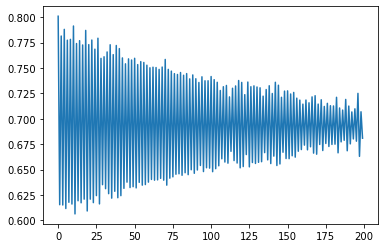

In [7]:
plt.plot([i for i in range(len(losses))], losses)